In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# load dataset
import pandas as pd
df = pd.read_csv("envv.csv")

In [4]:
df.head()

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [8]:
scaled_df.isna().sum()

co2_emissions       0
waste_production    0
gdp                 0
population          0
dtype: int64

In [9]:
X = scaled_df[['co2_emissions', 'waste_production']].values
X

array([[-0.41590018, -0.45246481],
       [ 1.58737745, -0.59325819],
       [ 0.82691712, -1.13514888],
       ...,
       [ 1.57344779, -0.69424553],
       [-0.33611361, -0.21159379],
       [-0.96315712, -1.14859293]], shape=(10000, 2))

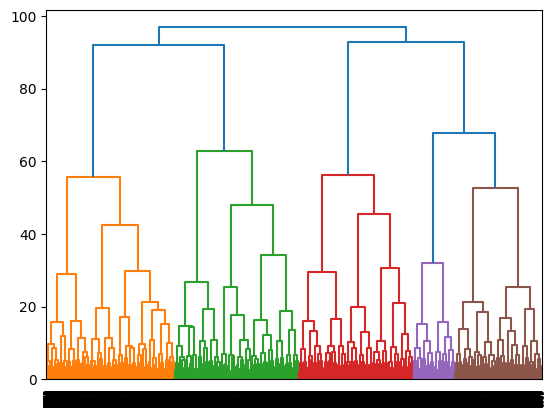

In [11]:
import scipy.cluster.hierarchy as sch
link = sch.linkage(scaled_df, method='ward')
dend = sch.dendrogram(link)

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
labels = model.fit_predict(scaled_data)
labels

array([0, 2, 2, ..., 2, 1, 0], shape=(10000,))

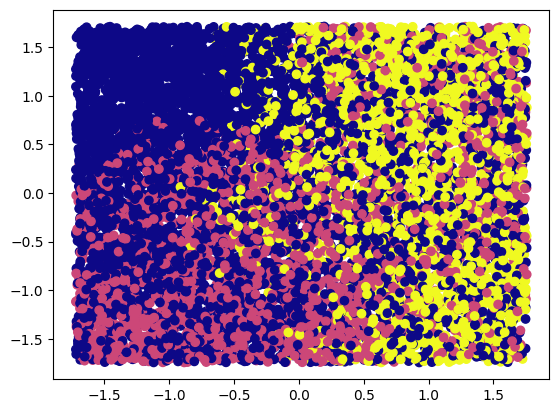

In [18]:
import matplotlib.pyplot as plt
plt.scatter(scaled_data[:,0], scaled_data[:,1], c = labels, cmap ="plasma")
plt.show()

In [21]:
## cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
type(cancer)

sklearn.utils._bunch.Bunch

In [23]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [24]:
# creating dataframe
cancer_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_df_scaled = scaler.fit_transform(cancer_df)
cancer_df_scaled[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(cancer_df_scaled)
X_new.shape

(569, 2)

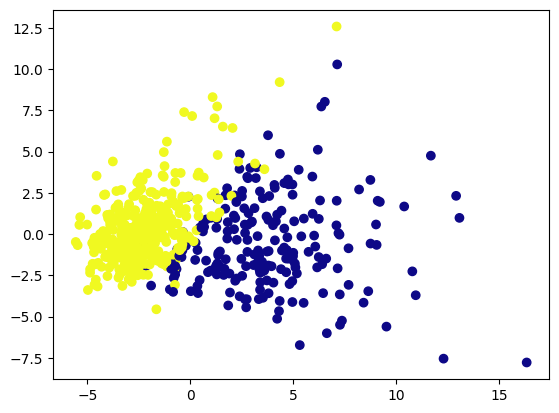

In [30]:
plt.scatter(X_new[:,0], X_new[:,1], c = cancer.target, cmap ="plasma")
plt.show()

In [31]:
pca.explained_variance_ 

array([13.30499079,  5.7013746 ])

In [32]:
13.30499079/(13.30499079+5.7013746)

0.7000281493588607